In [16]:
import mne
import pyedflib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [17]:
file = "SC4002E0-PSG.edf"
data = mne.io.read_raw_edf(file)
raw_data = data.get_data()
info = data.info
channels = data.ch_names

Extracting EDF parameters from /Users/boss/Desktop/Study/spring-2023/AABD/sleep-edf-database-expanded-1.0.0/sleep-cassette/SC4002E0-PSG.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


In [18]:
len(raw_data[0])
channels

['EEG Fpz-Cz',
 'EEG Pz-Oz',
 'EOG horizontal',
 'Resp oro-nasal',
 'EMG submental',
 'Temp rectal',
 'Event marker']

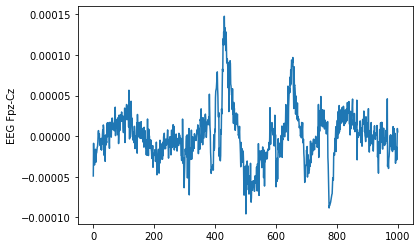

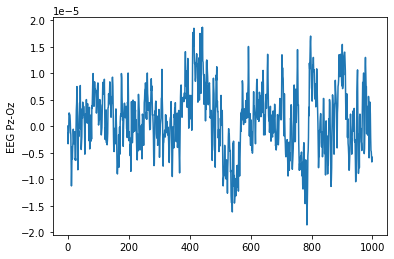

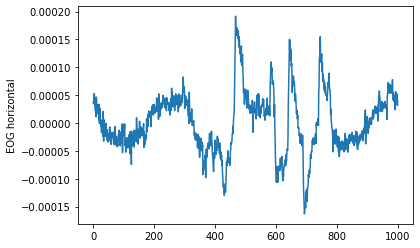

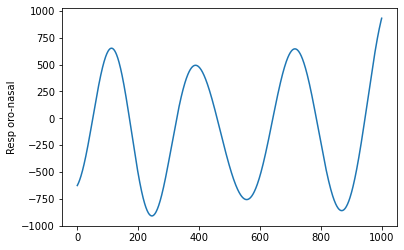

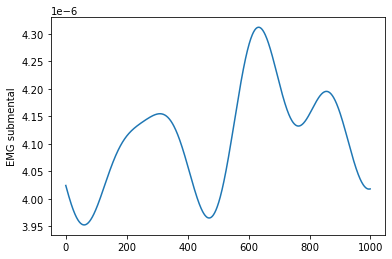

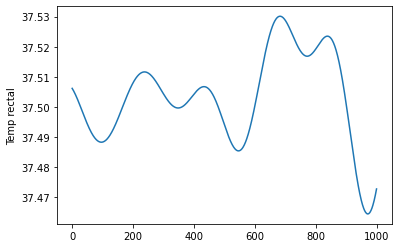

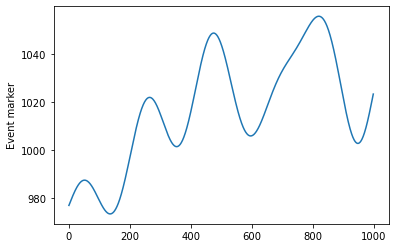

In [11]:
for i, elem in enumerate(channels):
    plt.plot(raw_data[i][:1000])
    plt.ylabel(elem)
    plt.show()

In [12]:
file = "SC4002EC-Hypnogram.edf"
anot = mne.read_annotations(file)
# raw_data = data.get_data()
# you can get the metadata included in the file and a list of all channels:
# info = data.info
# channels = data.ch_names


for i in range(len(anot)):
    print(i, anot[i])


0 OrderedDict([('onset', 0.0), ('duration', 26070.0), ('description', 'Sleep stage W'), ('orig_time', None)])
1 OrderedDict([('onset', 26070.0), ('duration', 90.0), ('description', 'Sleep stage 1'), ('orig_time', None)])
2 OrderedDict([('onset', 26160.0), ('duration', 510.0), ('description', 'Sleep stage 2'), ('orig_time', None)])
3 OrderedDict([('onset', 26670.0), ('duration', 270.0), ('description', 'Sleep stage 3'), ('orig_time', None)])
4 OrderedDict([('onset', 26940.0), ('duration', 1140.0), ('description', 'Sleep stage 4'), ('orig_time', None)])
5 OrderedDict([('onset', 28080.0), ('duration', 30.0), ('description', 'Movement time'), ('orig_time', None)])
6 OrderedDict([('onset', 28110.0), ('duration', 120.0), ('description', 'Sleep stage 3'), ('orig_time', None)])
7 OrderedDict([('onset', 28230.0), ('duration', 30.0), ('description', 'Sleep stage 4'), ('orig_time', None)])
8 OrderedDict([('onset', 28260.0), ('duration', 30.0), ('description', 'Sleep stage 3'), ('orig_time', None)

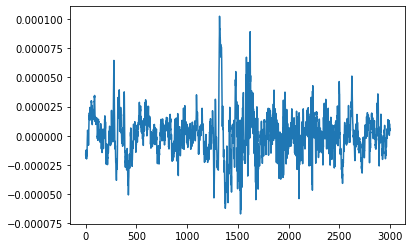

In [13]:
target = anot[148]

start = int(target['onset'] * 100)
end = int(start + target['duration'] * 100)
plt.plot(raw_data[0][start:end])
plt.show()

In [14]:
def get_stages(stage):
    res = []
    for i in range(len(anot)):
        if stage in anot[i]['description']:
            target = anot[i]
            start = int(target['onset'] * 100)
            end = int(start + target['duration'] * 100)
            res.append(start)
    return res

first = get_stages('1')
second = get_stages('2')
third = get_stages('3')
fourth = get_stages('4')
rem = get_stages('R')

min_len = min(len(rem), len(fourth))

target = fourth

for i in range(len(target)):
    table = []
    
    table.append(np.array(raw_data[0][target[i]:target[i] + 2500]))
#     table.append(np.array(raw_data[1][target[i]:target[i] + 2500]))
#     table.append(np.array(raw_data[2][target[i]:target[i] + 2500]))
    
    table = np.array(table)
    weight = 2500
    channel = 1
    img_numpy = table
    img_numpy = np.reshape(table,(50,50))

    img = Image.fromarray(img_numpy, "RGB")
    img.save("dataset_cz/fourth/{}.jpg".format(i))


In [15]:
mx = raw_data[0].max()
raw_data[0]

array([-4.89391941e-05, -8.71575092e-06, -3.25443223e-05, ...,
        2.72307692e-05,  5.12630037e-05,  6.27699634e-05])

In [19]:

def get_stages(stage):
    res = []
    for i in range(len(anot)):
        if stage in anot[i]['description']:
            target = anot[i]
            start = int(target['onset'] * 100)
            end = int(start + target['duration'] * 100)
            res.append(start)
    return res

first = get_stages('1')
second = get_stages('2')
third = get_stages('3')
fourth = get_stages('4')
rem = get_stages('R')

min_len = min(len(rem), len(fourth))


for i in range(min_len):
    table = []
    
    table.append(np.array(raw_data[0][rem[i]:rem[i] + 2500]))
    table.append(np.array(raw_data[1][rem[i]:rem[i] + 2500]))
    table.append(np.array(raw_data[2][rem[i]:rem[i] + 2500]))
    
    table = np.array(table)
#     print(table)
    
    
#     print(raw_data[0][first[i]:first[i] + 2500], len(raw_data[0][first[i]:first[i] + 2500]))
#     print(raw_data[0][second[i]:second[i] + 2500], len(raw_data[0][second[i]:second[i] + 2500]))
    
#     plt.plot(raw_data[0][first[i]:first[i] + 2500], color='b')
#     plt.plot(raw_data[0][second[i]:second[i] + 2500], color='g')
#     plt.plot(raw_data[0][third[i]:third[i] + 2500], color='b')
#     plt.plot(raw_data[0][fourth[i]:fourth[i] + 2500], color='y')
#     plt.plot(raw_data[0][rem[i]:rem[i] + 2500], color='m')
    
#     plt.show()
#         plt.plot(raw_data[0][start:start+2000])
#         plt.show()